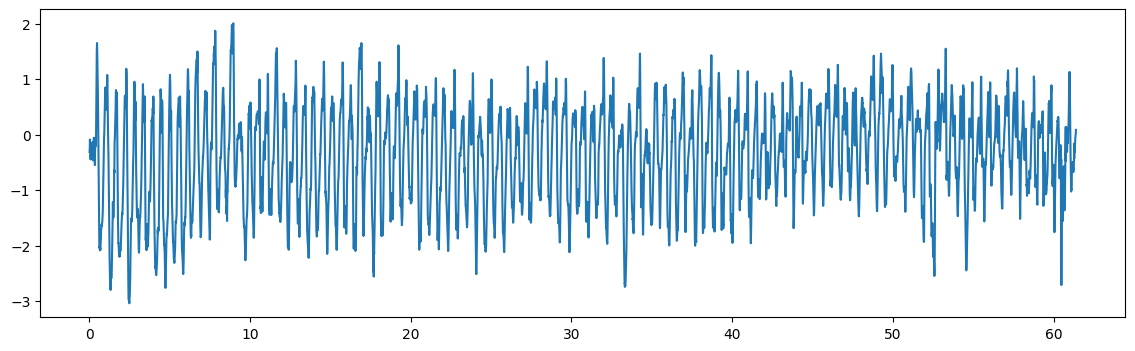

In [7]:
# Suorita taas ainakin minuutin mittainen havaintosarja, 
# jonka aikana kävelet tasaista reipasta vauhtia ja samalla mittaat kiihtyvyyttä 
# Phyphox-sovelluksella tai käyt¨a aiemmin askelmittarissa käytetty¨a dataa. 
# Laske askeleesi kävelyn aikana ja merkitse tulos muistiin.
# Tuo havaintodata Pythoniin ja piirr sen kuvaaja. 
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('askeldata.csv')
df.head()
plt.figure(figsize=(14,4))
#plt.plot(df['Time (s)'],df['Linear Acceleration x (m/s^2)'])
plt.plot(df['Time (s)'],df['Linear Acceleration y (m/s^2)'])
#plt.plot(df['Time (s)'],df['Linear Acceleration z (m/s^2)'])
#plt.legend(['x','y','z'])
plt.show()


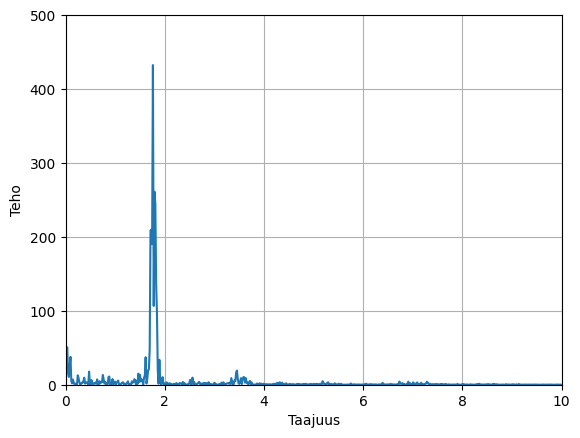

In [17]:
# Tutki, miten askelet näkyv¨at havainnoissa jaksollisena liikkeenä 
# Määrittele, mikä kiihtyvyyden komponentti näyttää jaksollisuuden parhaiten 
# ja valitse se seuraaviin kohtiin. 
# +++ Selkein jaksollisyys y-komponentissa +++

# Laske valitun komponentin Fourier-muunnos ja tehospektri.
import numpy as np
f = df['Linear Acceleration y (m/s^2)'] #Valittu signaali
t = df['Time (s)'] #Aika
N = len(df) #Havaintojen määrä
dt = np.max(t)/len(t) #Oletetaan sämpläystaajuus vakioksi

fourier = np.fft.fft(f,N) #Fourier-muunnos
psd = fourier*np.conj(fourier)/N #Tehospektri
freq = np.fft.fftfreq(N,dt) #Taajuudet
L = np.arange(1,int(N/2)) #Rajataan pois nollataajuus ja negatiiviset taajuudet

plt.plot(freq[L],psd[L].real)
plt.ylabel('Teho')
plt.xlabel('Taajuus')
plt.grid()
plt.axis([0,10,0,500])
plt.show()


In [25]:

# Määrittele tehospektristä tehokkain taajuus. 
# Vastaako tämä oletettua askeltaajuutta? 
# Laske askelten kokonaismäärä askeltaajuuden perusteella.
print('Kävelydatan tehokkain taajuus on ',freq[L][psd[L]==np.max(psd[L])][0],'Hz')
print('Tämä vastaa askeleeseen kuluvaa aikaa ',1/freq[L][psd[L]==np.max(psd[L])][0],'s')
print('Tällöin askelmäärä on', freq[L][psd[L]==np.max(psd[L])][0]*np.max(t),' askelta')

Kävelydatan tehokkain taajuus on  1.7594195516421045 Hz
Tämä vastaa askeleeseen kuluvaa aikaa  0.5683692664814814 s
Tällöin askelmäärä on 108.0  askelta


Sämpläytaajuus on 48000  Hz
Datassa on  425280  näytettä
Datan pitus on  8.86  s


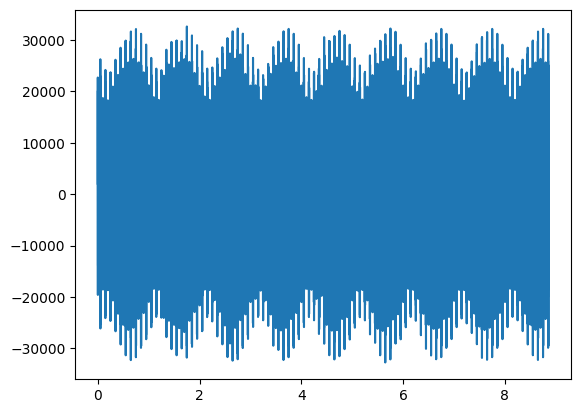

In [67]:
#9. Audiosignaali voidaan tuoda helposti Pythoniin .wav-muodossa seuraavasti 
from scipy.io import wavfile 
samplerate, data = wavfile.read('noisy_signal.wav') 
#samplerate, data = wavfile.read('less_noisy_signal.wav') 

# Vastaavasti voidaan signaali tallentaa 
#scaled = np.int16(data / np.max(np.abs(data)) * 32767) 
# write(’signal.wav’, samplerate, scaled) 
# Lataa Moodlesta äänitiedosto noisy signal.wav. 
# Poista siit¨a kohina Fourier-analyysiä käyttäen. 
# Tallenna puhdistettu tiedosto ja varmista kuuntelemalla, ett¨a menetelm¨a toimii.
print('Sämpläytaajuus on', samplerate,' Hz')
print('Datassa on ',len(data),' näytettä')
print('Datan pitus on ',len(data)/samplerate,' s')

#Määritellään aika
dt = 1/samplerate
t = np.arange(0,len(data)/samplerate,dt)
plt.plot(t,data)
plt.show()

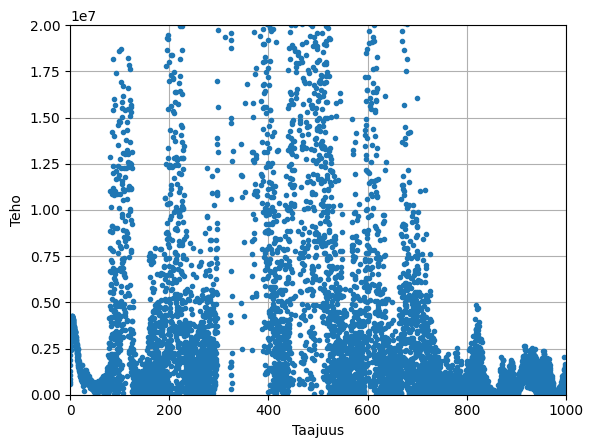

In [71]:
#Lasketaan Fuorier-muunnos ja tehopektri:
f = data
N = len(f) #Havaintojen määrä
fourier = np.fft.fft(f,N) #Fourier-muunnos
psd = fourier*np.conj(fourier)/N #Tehospektri
freq = np.fft.fftfreq(N,dt) #Taajuudet
L = np.arange(1,int(N/2)) #Rajataan pois nollataajuus ja negatiiviset taajuudet

plt.plot(freq[L],psd[L].real,'.')
plt.ylabel('Teho')
plt.xlabel('Taajuus')
plt.grid()
plt.axis([0,1000,0,2e10])
plt.show()

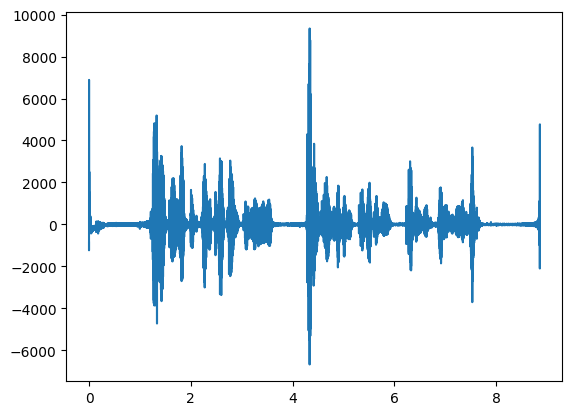

C:\Users\ilpovirt\AppData\Local\Temp\ipykernel_38076\3071479140.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  scaled = np.int16(signal_clean / np.max(np.abs(signal_clean)) * 32767)


In [76]:
fourier_clean = fourier.copy()
fourier_clean[psd>1e10] = 0 #Poistetaan tehokkaimmat taajuudet
#less_noisyn tapauksessa riittää poistaa tehokkaimmat taajuudet, taajuuskaistaa ei tarvitse poistaa

#Poistetaan valittu taajuuskaista:
fourier_clean[np.logical_and(np.abs(freq) > 250, np.abs(freq) < 450)] = 0
fourier_clean[np.abs(freq) > 10000] = 0

signal_clean = np.fft.ifft(fourier_clean)
plt.plot(t,signal_clean.real)
plt.show()

from scipy.io.wavfile import write
scaled = np.int16(signal_clean / np.max(np.abs(signal_clean)) * 32767) 
#write('cleaned_signal_less_noise.wav', samplerate, scaled) 
write('cleaned_signal.wav', samplerate, scaled) 

In [ ]:
#Kuinka signaali noisy_signal tehtiin:
#Tässä data on alunperin nauhoitettu puhdas signaali
t = np.arange(0,(len(data)/samplerate),1/samplerate)
noise1 = 5000*np.sin(2*np.pi*300*t) + 5000*np.sin(2*np.pi*320*t) +5000*np.sin(2*np.pi*340*t) + 5000*np.sin(2*np.pi*360*t) +5000*np.sin(2*np.pi*380*t) + 5000*np.sin(2*np.pi*400*t)
noise2 = 5000*np.sin(2*np.pi*301*t + 2) + 5000*np.sin(2*np.pi*330*t + 3) +5000*np.sin(2*np.pi*350*t + 5) 

#Signaalissa less_noisy_signal.wav ainoastaan häiriö 5000*np.sin(2*np.pi*300*t)

noisy_signal = noise1+ noise2 + data 